# Detecting spam: A worked example for part 2 activity
This is the worked example 'solution' for the part 2 activity. Please try out the activity before you review this notebook!


## Import the libraries we need

In [1]:
# Core libraries
import pandas as pd

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

# Matplotlib for charting
import matplotlib.pyplot as plt

Define a useful function.

In [18]:
# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    auc = roc_auc_score(y, probabilities)
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(auc,2)))
    
    # show the plot
    plt.show()
    
    return auc

## Load and understand the data

In [52]:
dataset = pd.read_csv("spam.csv")
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
# Size of data set
dataset.shape

(4601, 58)

In [53]:
# Check for nulls
dataset.isnull().mean()

word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_order               0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

## Check if we have balanced classes

In [9]:
# Class distribution - to check if we have balanced classes
dataset.spam.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

## Split into X and y

In [4]:
# Define the X (input) and y (target) features
X = dataset.drop("spam", axis=1)
y = dataset.spam

## Rescale

In [5]:
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

C:\Users\llewe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Train test split

In [6]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Build and check models

LogisticRegression
[[1798   94]
 [ 245  945]]
0.8900064892926671
              precision    recall  f1-score   support

    not spam       0.88      0.95      0.91      1892
        spam       0.91      0.79      0.85      1190

   micro avg       0.89      0.89      0.89      3082
   macro avg       0.89      0.87      0.88      3082
weighted avg       0.89      0.89      0.89      3082



C:\Users\llewe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


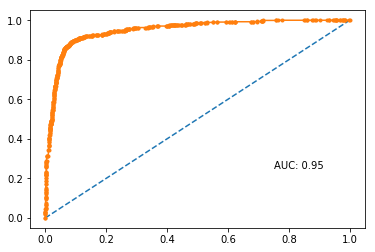

DecisionTreeClassifier
[[1892    0]
 [   1 1189]]
0.999675535366645
              precision    recall  f1-score   support

    not spam       1.00      1.00      1.00      1892
        spam       1.00      1.00      1.00      1190

   micro avg       1.00      1.00      1.00      3082
   macro avg       1.00      1.00      1.00      3082
weighted avg       1.00      1.00      1.00      3082



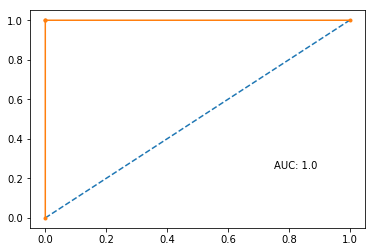

DecisionTreeClassifier
[[1734  158]
 [ 176 1014]]
0.8916288124594419
              precision    recall  f1-score   support

    not spam       0.91      0.92      0.91      1892
        spam       0.87      0.85      0.86      1190

   micro avg       0.89      0.89      0.89      3082
   macro avg       0.89      0.88      0.89      3082
weighted avg       0.89      0.89      0.89      3082



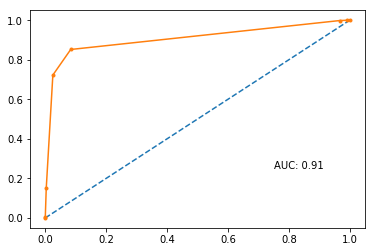

GaussianNB
[[1396  496]
 [  56 1134]]
0.8208955223880597
              precision    recall  f1-score   support

    not spam       0.96      0.74      0.83      1892
        spam       0.70      0.95      0.80      1190

   micro avg       0.82      0.82      0.82      3082
   macro avg       0.83      0.85      0.82      3082
weighted avg       0.86      0.82      0.82      3082



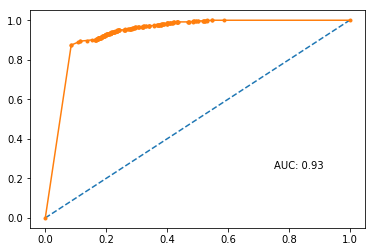

KNeighborsClassifier
[[1803   89]
 [ 120 1070]]
0.9321868916288124
              precision    recall  f1-score   support

    not spam       0.94      0.95      0.95      1892
        spam       0.92      0.90      0.91      1190

   micro avg       0.93      0.93      0.93      3082
   macro avg       0.93      0.93      0.93      3082
weighted avg       0.93      0.93      0.93      3082



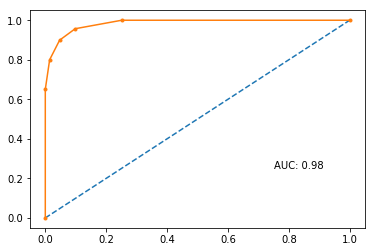

In [61]:
# Build and fit a few models
models = [LogisticRegression(), DecisionTreeClassifier(), DecisionTreeClassifier(max_depth=3), GaussianNB(), KNeighborsClassifier()]

for model in models:
    print(type(model).__name__)
    
    model.fit(X_train, y_train)
    
    # Predict the training data
    predictions = model.predict(X_train) 

    # Plot the confusion matrix
    print(confusion_matrix(y_train, predictions))

    # Accuracy score
    print(accuracy_score(y_train, predictions))

    # Classification report
    print(classification_report(y_train, predictions, target_names=['not spam','spam']))

    # ROC / AUC
    plotRocAuc(model, X_train, y_train)
    
    

## Evaluate models

LogisticRegression
----------------------------------


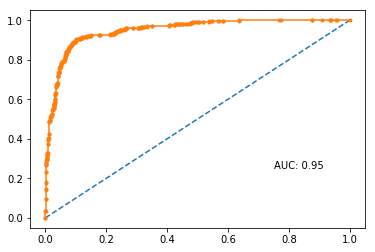

DecisionTreeClassifier
----------------------------------


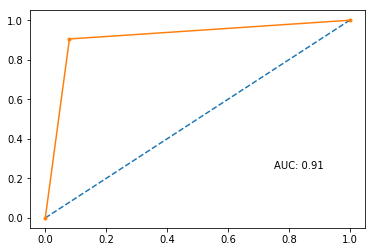

DecisionTreeClassifier
----------------------------------


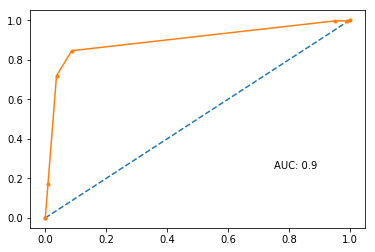

GaussianNB
----------------------------------


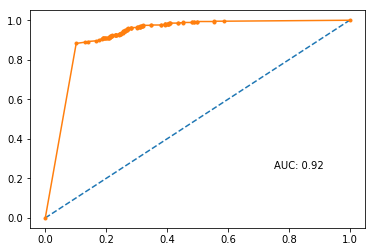

KNeighborsClassifier
----------------------------------


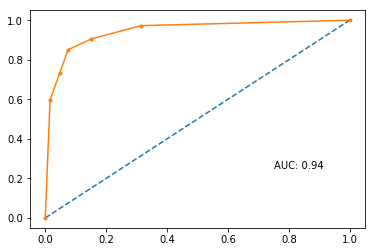

In [60]:
# Evaluate the models

# Create lists to hold the results
precision_recalls = []
aucs = []
accuracys = []

for model in models:
    print(type(model).__name__)    
    print("----------------------------------")

    # # Predict the test data
    predictions = model.predict(X_test)
    
    # Get the various evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision_recall_fscore = precision_recall_fscore_support(y_test, predictions)
    auc = plotRocAuc(model, X_test, y_test)
    
    # Add the metrics to the list
    accuracys.append(accuracy)
    precision_recalls.append(precision_recall_fscore)
    aucs.append(auc)
    

We want to optimise precision.  Let's see which model gives us the best precision:

In [59]:
print("Accuracy")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(accuracys[i],2))
    
print("\nPrecision")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][0][1],2))

print("\nRecall")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][1][1],2))
    
print("\nF1")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][2][1],2))
    
print("\nAuc")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(aucs[i],2))    

Accuracy
LogisticRegression 	 0.87
DecisionTreeClassifier 	 0.91
DecisionTreeClassifier 	 0.89
GaussianNB 	 0.82
KNeighborsClassifier 	 0.89

Precision
LogisticRegression 	 0.92
DecisionTreeClassifier 	 0.89
DecisionTreeClassifier 	 0.87
GaussianNB 	 0.7
KNeighborsClassifier 	 0.89

Recall
LogisticRegression 	 0.76
DecisionTreeClassifier 	 0.91
DecisionTreeClassifier 	 0.85
GaussianNB 	 0.96
KNeighborsClassifier 	 0.85

F1
LogisticRegression 	 0.83
DecisionTreeClassifier 	 0.9
DecisionTreeClassifier 	 0.86
GaussianNB 	 0.81
KNeighborsClassifier 	 0.87

Auc
LogisticRegression 	 0.95
DecisionTreeClassifier 	 0.91
DecisionTreeClassifier 	 0.9
GaussianNB 	 0.92
KNeighborsClassifier 	 0.94
